In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#%cd /content/gdrive/MyDrive

In [3]:
#!git clone https://github.com/noa-ehrenhalt/covid_tweets.git

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import itertools
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import tweepy as tw
from collections import Counter
import re
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/pos_and_neg_tweets_balanced_final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category,user_location_updated,user-country_code,user-country
0,0,0,AARPKY,Bluegrass State,Official AARP Kentucky Twitter. Get to know us...,2009-07-25 15:14:41,3266,2021-02-18 14:12:52,@3rdRetiredTeach See Kentucky's update vaccine...,0,0,False,Positive,Bluegrass State,USA,United States
1,1,1,GoSolar01,NaN,"Get all your solar info here, including latest...",2017-12-14 06:26:39,1861,2021-02-18 05:35:56,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,0,1,True,Positive,NaN,NaN,NaN
2,2,2,dr_hhq,"Karachi, Pakistan",Assistant Professor #Urology #SIUT - Half Prof...,2009-08-15 06:11:55,2378,2021-02-18 05:35:37,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,2,1,True,Positive,"Karachi, Pakistan",PAK,Pakistan
3,3,3,Nakhasi_MD,"Los Angeles, CA",Doc in Compton | Policy Adviser. LA County Dep...,2009-03-11 06:04:06,2205,2021-02-18 03:58:45,"RT @PinnacleTC_Hope: Holly Broce, president of...",0,1,True,Positive,"Los Angeles, CA",USA,United States
4,4,4,SonLaurencio,"Kentucky, USA",Pro Executive Entrepreneur #business #marketin...,2013-04-15 02:31:40,1558,2021-02-18 03:48:33,RT @LFCHD: A COVID-19 vaccine update thread:\n...,0,1,True,Positive,"Kentucky, USA",USA,United States


In [7]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'user_name'], axis=1, inplace=True)

In [8]:
df.head()

,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category,user_location_updated,user-country_code,user-country
0,Bluegrass State,Official AARP Kentucky Twitter. Get to know us...,2009-07-25 15:14:41,3266,2021-02-18 14:12:52,@3rdRetiredTeach See Kentucky's update vaccine...,0,0,False,Positive,Bluegrass State,USA,United States
1,NaN,"Get all your solar info here, including latest...",2017-12-14 06:26:39,1861,2021-02-18 05:35:56,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,0,1,True,Positive,NaN,NaN,NaN
2,"Karachi, Pakistan",Assistant Professor #Urology #SIUT - Half Prof...,2009-08-15 06:11:55,2378,2021-02-18 05:35:37,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,2,1,True,Positive,"Karachi, Pakistan",PAK,Pakistan
3,"Los Angeles, CA",Doc in Compton | Policy Adviser. LA County Dep...,2009-03-11 06:04:06,2205,2021-02-18 03:58:45,"RT @PinnacleTC_Hope: Holly Broce, president of...",0,1,True,Positive,"Los Angeles, CA",USA,United States
4,"Kentucky, USA",Pro Executive Entrepreneur #business #marketin...,2013-04-15 02:31:40,1558,2021-02-18 03:48:33,RT @LFCHD: A COVID-19 vaccine update thread:\n...,0,1,True,Positive,"Kentucky, USA",USA,United States


NLP preprocessing

add column with clean tweet

In [9]:
import re

df["up_text"] = df.text.str.lower()
#Remove twitter handlers
df.up_text = df.up_text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.up_text = df.up_text.apply(lambda x:re.sub(r'\B#\S+','',x))

# Remove URLS
df.up_text = df.up_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
df.up_text = df.up_text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
df.up_text = df.up_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
df.up_text = df.up_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [10]:
# Contractions
df.up_text = df.up_text.apply(lambda x:re.sub(r"he's", "he is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"there's", "there is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"We're", "We are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"That's", "That is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"won't", "will not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"they're", "they are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Can't", "Cannot", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"wasn't", "was not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"don\x89Ûªt", "do not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"aren't", "are not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"isn't", "is not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"What's", "What is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"haven't", "have not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"hasn't", "has not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"There's", "There is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"He's", "He is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"It's", "It is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"You're", "You are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I'M", "I am", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"shouldn't", "should not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"wouldn't", "would not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"i'm", "I am", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I\x89Ûªm", "I am", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I'm", "I am", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Isn't", "is not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Here's", "Here is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"you've", "you have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"you\x89Ûªve", "you have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"we're", "we are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"what's", "what is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"couldn't", "could not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"we've", "we have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"it\x89Ûªs", "it is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"doesn\x89Ûªt", "does not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"It\x89Ûªs", "It is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Here\x89Ûªs", "Here is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"who's", "who is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I\x89Ûªve", "I have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"y'all", "you all", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"can\x89Ûªt", "cannot", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"would've", "would have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"it'll", "it will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"we'll", "we will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"wouldn\x89Ûªt", "would not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"We've", "We have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"he'll", "he will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Y'all", "You all", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Weren't", "Were not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Didn't", "Did not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"they'll", "they will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"they'd", "they would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"DON'T", "DO NOT", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"That\x89Ûªs", "That is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"they've", "they have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"i'd", "I would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"should've", "should have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"You\x89Ûªre", "You are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"where's", "where is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Don\x89Ûªt", "Do not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"we'd", "we would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"i'll", "I will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"weren't", "were not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"They're", "They are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Can\x89Ûªt", "Cannot", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"you\x89Ûªll", "you will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I\x89Ûªd", "I would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"let's", "let us", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"it's", "it is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"can't", "cannot", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"don't", "do not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"you're", "you are", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"i've", "I have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"that's", "that is", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"i'll", "I will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"doesn't", "does not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"i'd", "I would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"didn't", "did not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"ain't", "am not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"you'll", "you will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I've", "I have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Don't", "do not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I'll", "I will", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"I'd", "I would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Let's", "Let us", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"you'd", "You would", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Ain't", "am not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Haven't", "Have not", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Could've", "Could have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"youve", "you have", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"donå«t", "do not", x))
# Character entity references
df.up_text = df.up_text.apply(lambda x:re.sub(r"&gt;", ">", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"&lt;", "<", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"&amp;", "&", x))
# Typos, slang and informal abbreviations
df.up_text = df.up_text.apply(lambda x:re.sub(r"w/e", "whatever", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"w/", "with", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"USAgov", "USA government", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"recentlu", "recently", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Ph0tos", "Photos", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"amirite", "am I right", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"exp0sed", "exposed", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"<3", "love", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"amageddon", "armageddon", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"Trfc", "Traffic", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"WindStorm", "Wind Storm", x))
df.up_text = df.up_text.apply(lambda x:re.sub(r"lmao", "laughing my ass off", x))

remove tweet that are only @

In [11]:
df.drop(index=df[df['up_text']==""].index, inplace=True)

Sentiment analysis

In [12]:
sid = SIA()
df['sia'] = df['up_text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
df['positive sentiments'] = df['sia'].apply(lambda x: x['pos']+1*(10**-6))
df['neutral sentiments'] = df['sia'].apply(lambda x: x['neu']+1*(10**-6))
df['negative sentiments'] = df['sia'].apply(lambda x: x['neg']+1*(10**-6))

df.drop(columns=['sia'],inplace=True)

In [13]:
def get_sentiment(df):
  sent = [df['negative sentiments'],df['positive sentiments']]
  max = np.argmax(sent)
  if df['negative sentiments']== df['positive sentiments']:
    return "Neut"
  elif max ==0:
    return 'Neg'
  else:
    return 'Pos'

Define tweet sentiment

In [14]:
df['sentiments'] = df.apply(get_sentiment,axis=1)

add lemma column

In [15]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['up_text'].apply(lambda x: tokenization(x.lower()))
stopword = stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

In [16]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [17]:
df['lemmatized_dict'] = df['lemmatized'].apply(lambda x: Counter(x))

remove unnecessery columns

In [18]:
df.columns

Index(['user_location', 'user_description', 'user_created', 'user_followers',
       'date', 'text', 'favorites', 'retweets', 'is_retweet', 'category',
       'user_location_updated', 'user-country_code', 'user-country', 'up_text',
       'positive sentiments', 'neutral sentiments', 'negative sentiments',
       'sentiments', 'tokenized', 'No_stopwords', 'lemmatized',
       'lemmatized_dict'],
      dtype='object')

In [19]:
df.head()

,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category,user_location_updated,user-country_code,user-country,up_text,positive sentiments,neutral sentiments,negative sentiments,sentiments,tokenized,No_stopwords,lemmatized,lemmatized_dict
0,Bluegrass State,Official AARP Kentucky Twitter. Get to know us...,2009-07-25 15:14:41,3266,2021-02-18 14:12:52,@3rdRetiredTeach See Kentucky's update vaccine...,0,0,False,Positive,Bluegrass State,USA,United States,see kentuckyupdate vaccine website the vaccine...,0.231001,0.769001,0.000001,Pos,"[see, kentuckyupdate, vaccine, website, the, v...","[see, kentuckyupdate, vaccine, website, vaccin...","[see, kentuckyupdate, vaccine, website, vaccin...","{'see': 1, 'kentuckyupdate': 1, 'vaccine': 2, ..."
1,NaN,"Get all your solar info here, including latest...",2017-12-14 06:26:39,1861,2021-02-18 05:35:56,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,0,1,True,Positive,NaN,NaN,NaN,rt chipped,0.000001,1.000001,0.000001,Neut,"[rt, chipped]","[rt, chipped]","[rt, chipped]","{'rt': 1, 'chipped': 1}"
2,"Karachi, Pakistan",Assistant Professor #Urology #SIUT - Half Prof...,2009-08-15 06:11:55,2378,2021-02-18 05:35:37,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,2,1,True,Positive,"Karachi, Pakistan",PAK,Pakistan,chipped,0.000001,1.000001,0.000001,Neut,[chipped],[chipped],[chipped],{'chipped': 1}
3,"Los Angeles, CA",Doc in Compton | Policy Adviser. LA County Dep...,2009-03-11 06:04:06,2205,2021-02-18 03:58:45,"RT @PinnacleTC_Hope: Holly Broce, president of...",0,1,True,Positive,"Los Angeles, CA",USA,United States,rt holly broce president of our opioid treatme...,0.077001,0.923001,0.000001,Pos,"[rt, holly, broce, president, of, our, opioid,...","[rt, holly, broce, president, opioid, treatmen...","[rt, holly, broce, president, opioid, treatmen...","{'rt': 1, 'holly': 1, 'broce': 1, 'president':..."
4,"Kentucky, USA",Pro Executive Entrepreneur #business #marketin...,2013-04-15 02:31:40,1558,2021-02-18 03:48:33,RT @LFCHD: A COVID-19 vaccine update thread:\n...,0,1,True,Positive,"Kentucky, USA",USA,United States,rtcovid 19 vaccine update thread we ve vaccina...,0.000001,1.000001,0.000001,Neut,"[rtcovid, 19, vaccine, update, thread, we, ve,...","[rtcovid, 19, vaccine, update, thread, vaccina...","[rtcovid, 19, vaccine, update, thread, vaccina...","{'rtcovid': 1, '19': 2, 'vaccine': 1, 'update'..."


In [20]:
df.drop(['tokenized', 'No_stopwords','lemmatized'], axis=1, inplace=True)

In [21]:
scale_df = df.loc[:, ['user_followers', 'favorites', 'retweets']]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(scale_df)
scale_df = scaler1.transform(scale_df)
display(scale_df)

array([[-0.03758725, -0.12391963, -0.1191466 ],
       [-0.05243501, -0.12391963, -0.11775992],
       [-0.04697146, -0.03488269, -0.11775992],
       ...,
       [-0.06647962, -0.12391963,  2.32001873],
       [-0.07129854, -0.12391963,  2.32001873],
       [-0.07195374, -0.12391963,  2.32001873]])

In [23]:
scale_df = pd.DataFrame(scale_df)
scale_df.columns = ['user_followers_norm', 'favorites_norm', 'retweets_norm']
scale_df

,user_followers_norm,favorites_norm,retweets_norm
0,-0.037587,-0.123920,-0.119147
1,-0.052435,-0.123920,-0.117760
2,-0.046971,-0.034883,-0.117760
3,-0.048800,-0.123920,-0.117760
4,-0.055637,-0.123920,-0.117760
...,...,...,...
36591,-0.071330,-0.123920,2.320019
36592,-0.071690,-0.123920,2.320019
36593,-0.066480,-0.123920,2.320019
36594,-0.071299,-0.123920,2.320019


In [24]:
df = pd.concat([df, scale_df], axis = 1)

['user_location', 'user_description', 'user_created', 'user_followers',
       'date', 'text', 'favorites', 'retweets', 'is_retweet', 'category',
       'user_location_updated', 'user-country_code', 'user-country', 'up_text',
       'positive sentiments', 'neutral sentiments', 'negative sentiments',
       'sentiments', 'tokenized', 'No_stopwords', 'lemmatized',
       'lemmatized_dict']

In [25]:
df.drop(['user_description', 'user_created', 'date', 'text', 'is_retweet', 'lemmatized_dict', 'up_text','positive sentiments', 'neutral sentiments', 'negative sentiments', 'user_followers', 'favorites', 'retweets', 'user_location', 'user_location_updated', 'user_location_updated', 'user-country', 'user-country_code'], axis=1, inplace=True)

In [26]:
df.columns

Index(['category', 'sentiments', 'user_followers_norm', 'favorites_norm',
       'retweets_norm'],
      dtype='object')

In [27]:
numeric_cols = df._get_numeric_data().columns
numeric_cols

Index(['user_followers_norm', 'favorites_norm', 'retweets_norm'], dtype='object')

In [28]:
country = 'user_location'

In [29]:
dum = set(df.columns) - set(numeric_cols) - set([country])
for i in dum:
  df = pd.concat([df, pd.get_dummies(df[i], prefix=str(i))],axis=1)
  df.drop([i],axis=1, inplace=True)

display(df)

,user_followers_norm,favorites_norm,retweets_norm,sentiments_Neg,sentiments_Neut,sentiments_Pos,category_Negative,category_Positive
0,-0.037587,-0.123920,-0.119147,0,0,1,0,1
1,-0.052435,-0.123920,-0.117760,0,1,0,0,1
2,-0.046971,-0.034883,-0.117760,0,1,0,0,1
3,-0.048800,-0.123920,-0.117760,0,0,1,0,1
4,-0.055637,-0.123920,-0.117760,0,1,0,0,1
...,...,...,...,...,...,...,...,...
36691,NaN,NaN,NaN,0,0,1,1,0
36692,NaN,NaN,NaN,0,0,1,1,0
36693,NaN,NaN,NaN,0,0,1,1,0
36694,NaN,NaN,NaN,0,0,1,1,0


In [30]:
df.drop(['category_Positive'], axis=1, inplace=True)

In [31]:
df.isnull().sum(axis = 0)

user_followers_norm    100
favorites_norm         100
retweets_norm          100
sentiments_Neg           0
sentiments_Neut          0
sentiments_Pos           0
category_Negative        0
dtype: int64

In [32]:
df.dropna(axis=0, inplace=True)

In [33]:
dependent = 'category_Negative'
y = df[dependent]
choosen_cols = set(df.columns) -set([dependent])
X = df[choosen_cols]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logreg = LogisticRegression()

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(5),
              scoring='accuracy',
              min_features_to_select=2)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Optimal number of features : {rfecv.support_}")
print(f"Optimal number of features : {rfecv.ranking_}")

Optimal number of features : 5
Optimal number of features : [ True  True False  True  True  True]
Optimal number of features : [1 1 2 1 1 1]


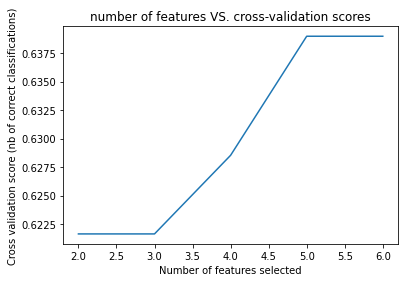

In [36]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(2,
               len(rfecv.grid_scores_) + 2),
         rfecv.grid_scores_)
plt.title("number of features VS. cross-validation scores")
plt.show()

In [37]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


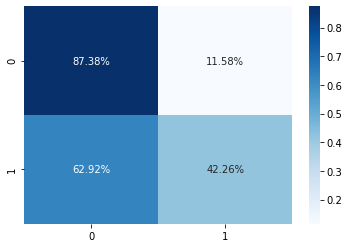

In [38]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, fmt='.2%', cmap='Blues')

Confusion matrix, without normalization
[[3061  442]
 [2204 1613]]
Normalized confusion matrix
[[0.87382244 0.12617756]
 [0.57741682 0.42258318]]


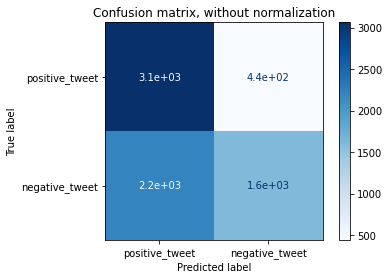

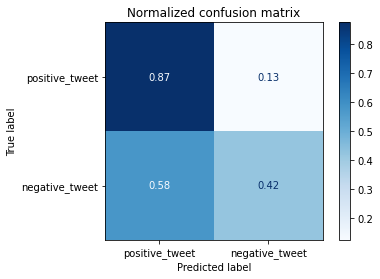

In [39]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['positive_tweet', 'negative_tweet']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [55]:
from sklearn.metrics import classification_report

target_names = ['non-anti-vax', 'anti-vax']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-anti-vax       0.58      0.87      0.70      3503
    anti-vax       0.78      0.42      0.55      3817

    accuracy                           0.64      7320
   macro avg       0.68      0.65      0.62      7320
weighted avg       0.69      0.64      0.62      7320



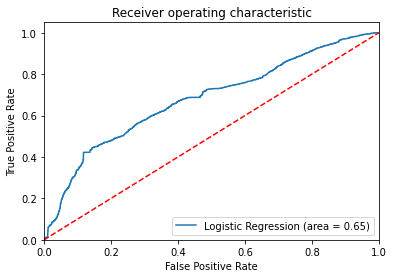

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score

precision, recall, tresh = precision_recall_curve(y_test, y_pred)